# Exploration

This notebook provides some additional exploration of the underlying material.

## Quantitiy of interest

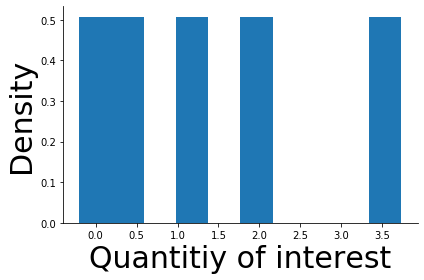

In [4]:
df_params = pd.read_pickle(RSLT_DIR / "mc_quantity.uq.pkl")

fig, ax = plt.subplots()   
ax.hist(df_params.values, density=True);
ax.set_xlabel("Quantitiy of interest")
ax.set_ylabel("Density")

fig.savefig(RSLT_DIR / "fig-quantitiy-of-interest")

## Parameterization

We want to have a look at the underlying sampling of the paramterization.

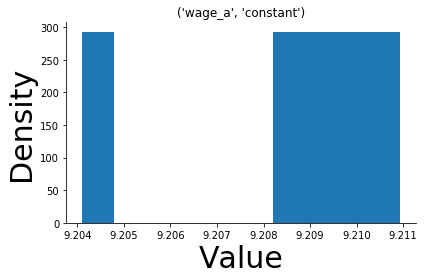

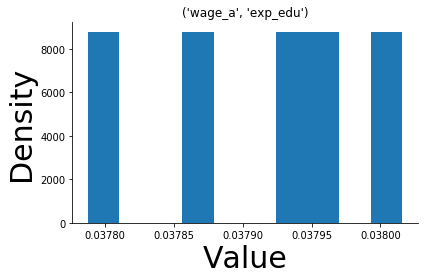

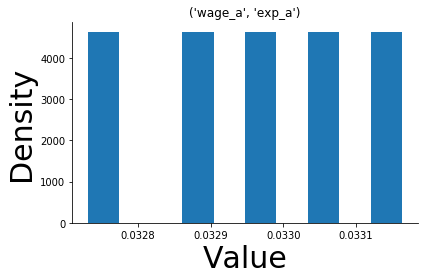

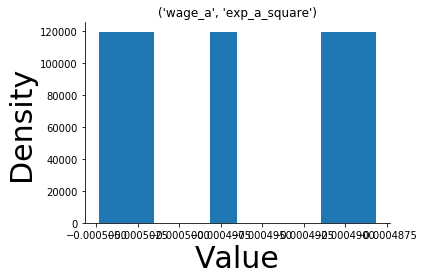

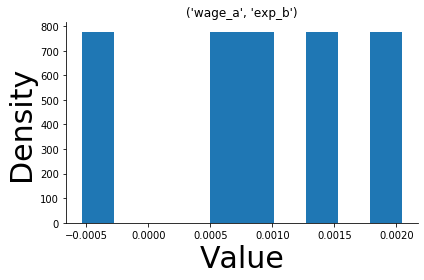

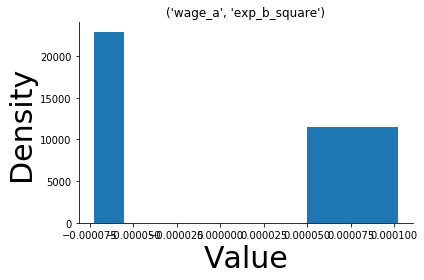

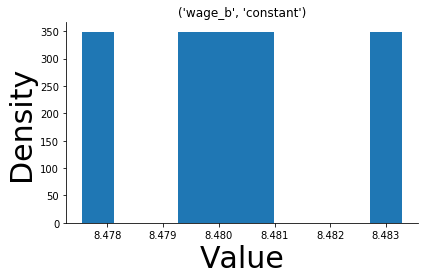

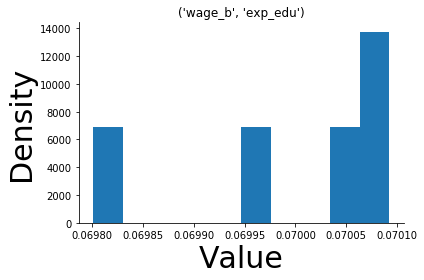

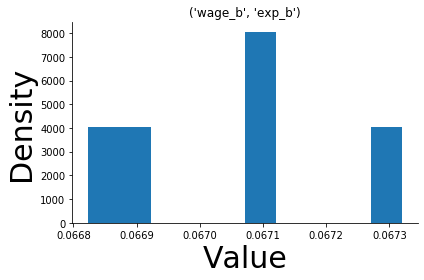

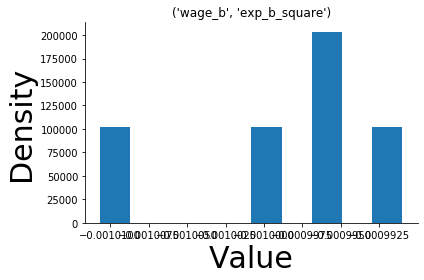

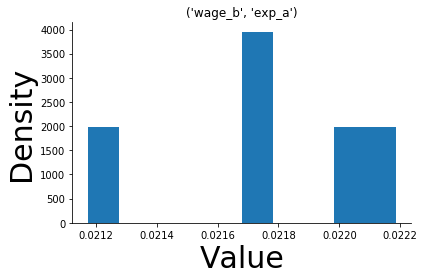

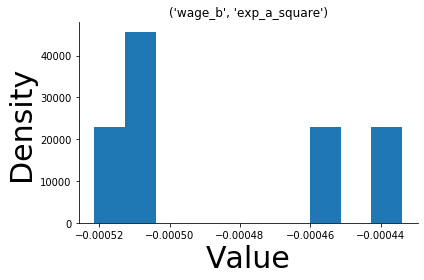

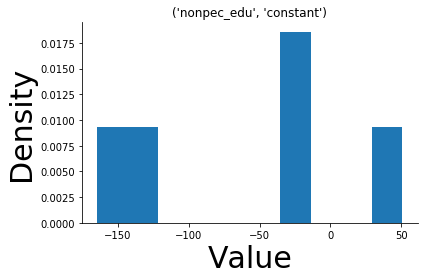

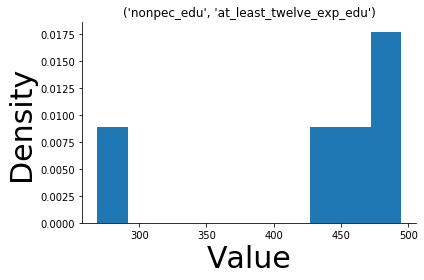

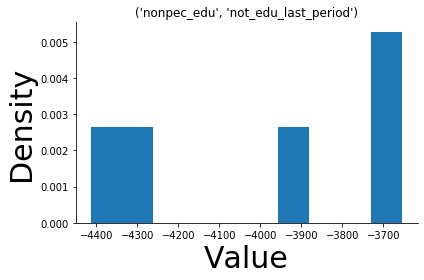

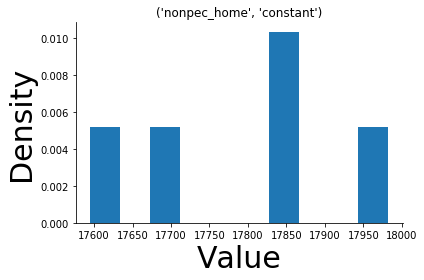

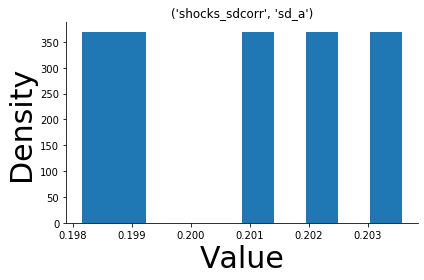

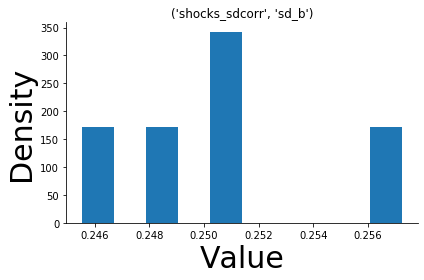

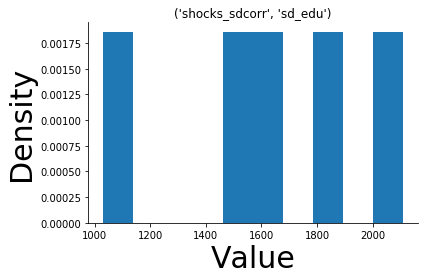

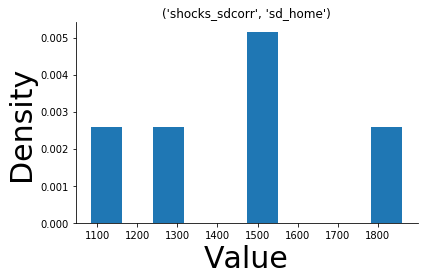

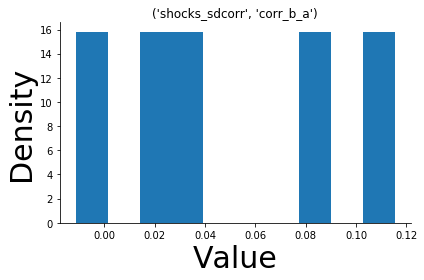

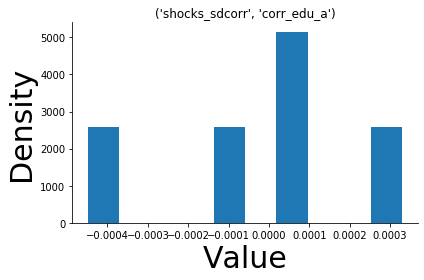

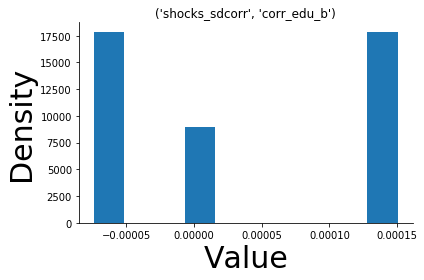

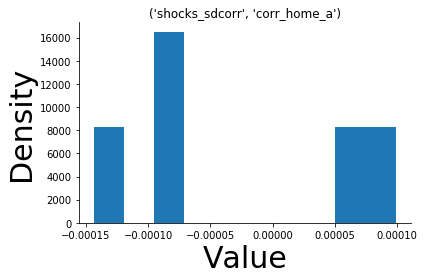

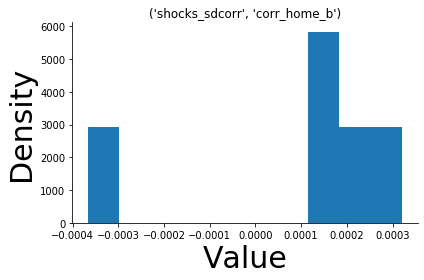

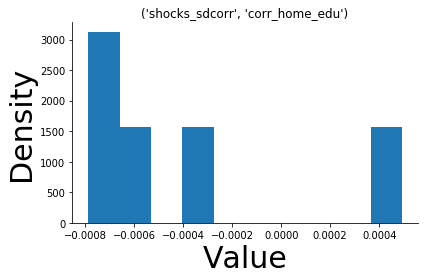

In [5]:
df_params = pd.read_pickle(RSLT_DIR / "mc_params.uq.pkl")

for name in df_params.loc[0, :, :].index.droplevel():
    
    sample = df_params.loc[(slice(None), *name)]
    
    # Some parameters remain fixed.
    if sample.describe()['std'] == 0:
        continue
    
    fig, ax = plt.subplots()
    ax.set_title(name)
    ax.hist(sample, density=True)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")